## Load the Model


Install the huggingface implementation.

In [ ]:
!pip install pytorch-pretrained-bert

In [ ]:
#BERT_MODEL = 'bert-base-uncased'
#BERT_MODEL = 'bert-large-uncased'

BERT_MODEL = 'bert-base-cased'
#BERT_MODEL = 'bert-large-cased'


#BERT_MODEL = 'bert-base-multilingual-uncased'
#BERT_MODEL = 'bert-base-multilingual-cased'

#BERT_MODEL = 'bert-base-chinese'

In [ ]:
import torch
from pytorch_pretrained_bert import BertTokenizer
# Load pre-trained model tokenizer (vocabulary)
tokenizer = BertTokenizer.from_pretrained(BERT_MODEL)

## Inspect BERT Vocabulary
--------------------------

### Vocab Dump
--------------

Retrieve the entire list of "tokens" and write these out to text files so we can peruse them.

In [ ]:
with open("vocabulary.txt", 'w') as f:
    
    # For each token...
    for token in tokenizer.vocab.keys():
        
        # Write it out and escape any unicode characters.            
        f.write(token + '\n')


From perusing the vocab, I'm seeing that:

* The first 999 tokens (1-indexed) appear to be reserved, and most are of the form [unused957].
    * 1   - [PAD]
    * 101 - [UNK]
    * 102 - [CLS]
    * 103 - [SEP]
    * 104 - [MASK]
* Rows 1000-1996 appear to be a dump of individual characters. 
    * They don't appear to be sorted by frequency (e.g., the letters of the alphabet are all in sequence).
* The first word is "the" at position 1997.
    * From there, the words appear to be sorted by frequency. 
    * The top ~18 words are whole words, and then number 2016 is ##s, presumably the most common subword.
    * The last whole word is at 29612, "necessitated"

Some funny inclusions:
* starbucks
* triassic
* abolitionist
* 1679

### Single Characters
---------------------

The following code prints out all of the single character tokens in vocabulary, as well as all of the single-character tokens preceded by '##'.

It turns out that these are matching sets--for every standalone character there is also a '##' version. There are 997 single character tokens.

The following cell iterates over the vocabulary, pulling out all of the single character tokens.

In [ ]:
one_chars = []
one_chars_hashes = []

# For each token in the vocabulary...
for token in tokenizer.vocab.keys():
    
    # Record any single-character tokens.
    if len(token) == 1:
        one_chars.append(token)
    
    # Record single-character tokens preceded by the two hashes.    
    elif len(token) == 3 and token[0:2] == '##':
        one_chars_hashes.append(token)


In [ ]:
print('Number of single character tokens:', len(one_chars), '\n')

# Print all of the single characters, 40 per row.

# For every batch of 40 tokens...
for i in range(0, len(one_chars), 40):
    
    # Limit the end index so we don't go past the end of the list.
    end = min(i + 40, len(one_chars) + 1)
    
    # Print out the tokens, separated by a space.
    print(' '.join(one_chars[i:end]))

Number of single character tokens: 997 

! " # $ % & ' ( ) * + , - . / 0 1 2 3 4 5 6 7 8 9 : ; < = > ? @ A B C D E F G H
I J K L M N O P Q R S T U V W X Y Z [ \ ] ^ _ ` a b c d e f g h i j k l m n o p
q r s t u v w x y z { | } ~ ¡ ¢ £ ¥ § ¨ © ª « ¬ ® ° ± ² ³ ´ µ ¶ · ¹ º » ¼ ½ ¾ ¿
À Á Â Ä Å Æ Ç È É Í Î Ñ Ó Ö × Ø Ú Ü Þ ß à á â ã ä å æ ç è é ê ë ì í î ï ð ñ ò ó
ô õ ö ÷ ø ù ú û ü ý þ ÿ Ā ā ă ą Ć ć Č č ď Đ đ ē ė ę ě ğ ġ Ħ ħ ĩ Ī ī İ ı ļ Ľ ľ Ł
ł ń ņ ň ŋ Ō ō ŏ ő Œ œ ř Ś ś Ş ş Š š Ţ ţ ť ũ ū ŭ ů ű ų ŵ ŷ ź Ż ż Ž ž Ə ƒ ơ ư ǎ ǐ
ǒ ǔ ǫ Ș ș Ț ț ɐ ɑ ɔ ɕ ə ɛ ɡ ɣ ɨ ɪ ɲ ɾ ʀ ʁ ʂ ʃ ʊ ʋ ʌ ʐ ʑ ʒ ʔ ʰ ʲ ʳ ʷ ʻ ʼ ʾ ʿ ˈ ː
ˡ ˢ ˣ ́ ̃ ̍ ̯ ͡ Α Β Γ Δ Ε Η Θ Ι Κ Λ Μ Ν Ο Π Σ Τ Φ Χ Ψ Ω ά έ ή ί α β γ δ ε ζ η θ
ι κ λ μ ν ξ ο π ρ ς σ τ υ φ χ ψ ω ό ύ ώ І Ј А Б В Г Д Е Ж З И К Л М Н О П Р С Т
У Ф Х Ц Ч Ш Э Ю Я а б в г д е ж з и й к л м н о п р с т у ф х ц ч ш щ ъ ы ь э ю
я ё і ї ј њ ћ Ա Հ ա ե ի կ մ յ ն ո ս տ ր ւ ְ ִ ֵ ֶ ַ ָ ֹ ּ א ב ג ד ה ו ז ח ט י כ
ל ם מ ן נ ס ע פ צ ק ר ש ת ، ء آ أ إ ئ ا ب ة ت ث ج ح خ د ذ ر ز س ش ص ض ط ظ ع غ ف

In [ ]:
print('Number of single character tokens with hashes:', len(one_chars_hashes), '\n')

# Print all of the single characters, 40 per row.

# Strip the hash marks, since they just clutter the display.
tokens = [token.replace('##', '') for token in one_chars_hashes]

# For every batch of 40 tokens...
for i in range(0, len(tokens), 40):
    
    # Limit the end index so we don't go past the end of the list.
    end = min(i + 40, len(tokens) + 1)
    
    # Print out the tokens, separated by a space.
    print(' '.join(tokens[i:end]))

Number of single character tokens with hashes: 997 

s a e n d i y o r t l m h u k g 1 2 3 4 6 7 0 5 9 z A 8 p C c S x b T v E B R f
P M D L I w N F O G K V U é W H X j Y q J ō Q Z á í ć ° ó ₂ à ā ū š а ² ī ₃ ₁ ı
ú ⁺ ë ₄ ý ½ я ă ه α ي å о й н ü и ä ن ø ς د ş č ₀ ń ö е ³ ر ò р ł ₙ ᵢ ì ß ù ة ν
ș ê − م ♭ è ! " # $ % & ' ( ) * + , - . / : ; < = > ? @ [ \ ] ^ _ ` { | } ~ ¡ ¢
£ ¥ § ¨ © ª « ¬ ® ± ´ µ ¶ · ¹ º » ¼ ¾ ¿ À Á Â Ä Å Æ Ç È É Í Î Ñ Ó Ö × Ø Ú Ü Þ â
ã æ ç î ï ð ñ ô õ ÷ û þ ÿ Ā ą Ć Č ď Đ đ ē ė ę ě ğ ġ Ħ ħ ĩ Ī İ ļ Ľ ľ Ł ņ ň ŋ Ō ŏ
ő Œ œ ř Ś ś Ş Š Ţ ţ ť ũ ŭ ů ű ų ŵ ŷ ź Ż ż Ž ž Ə ƒ ơ ư ǎ ǐ ǒ ǔ ǫ Ș Ț ț ɐ ɑ ɔ ɕ ə
ɛ ɡ ɣ ɨ ɪ ɲ ɾ ʀ ʁ ʂ ʃ ʊ ʋ ʌ ʐ ʑ ʒ ʔ ʰ ʲ ʳ ʷ ʻ ʼ ʾ ʿ ˈ ː ˡ ˢ ˣ ́ ̃ ̍ ̯ ͡ Α Β Γ Δ
Ε Η Θ Ι Κ Λ Μ Ν Ο Π Σ Τ Φ Χ Ψ Ω ά έ ή ί β γ δ ε ζ η θ ι κ λ μ ξ ο π ρ σ τ υ φ χ
ψ ω ό ύ ώ І Ј А Б В Г Д Е Ж З И К Л М Н О П Р С Т У Ф Х Ц Ч Ш Э Ю Я б в г д ж з
к л м п с т у ф х ц ч ш щ ъ ы ь э ю ё і ї ј њ ћ Ա Հ ա ե ի կ մ յ ն ո ս տ ր ւ ְ ִ
ֵ ֶ ַ ָ ֹ ּ א ב ג ד ה ו ז ח ט י כ ל ם מ ן נ ס ע פ צ ק ר ש ת ، ء آ أ

In [ ]:
print('Are the two sets identical?', set(one_chars) == set(tokens))

Are the two sets identical? True


### Subwords vs. Whole-words
Let's gather some statistics on the vocabulary.



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Maximum token length: 18


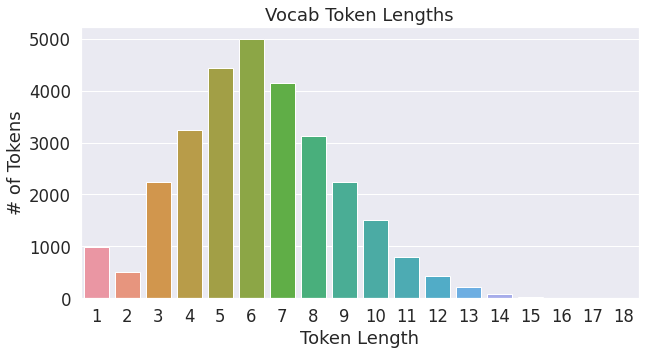

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (10,5)

# Measure the length of every token in the vocab.
token_lengths = [len(token) for token in tokenizer.vocab.keys()]

# Plot the number of tokens of each length.
sns.countplot(token_lengths)
plt.title('Vocab Token Lengths')
plt.xlabel('Token Length')
plt.ylabel('# of Tokens')

print('Maximum token length:', max(token_lengths))

Let's look at just the tokens which begin with '##'.

In [ ]:
num_subwords = 0

subword_lengths = []

# For each token in the vocabulary...
for token in tokenizer.vocab.keys():
    
    # If it's a subword...
    if len(token) >= 2 and token[0:2] == '##':
        
        # Tally all subwords
        num_subwords += 1

        # Measure the sub word length (without the hashes)
        length = len(token) - 2

        # Record the lengths.        
        subword_lengths.append(length)


How many '##' tokens are there vs. the full vocab?

In [ ]:
vocab_size = len(tokenizer.vocab.keys())

print('Number of subwords: {:,} of {:,}'.format(num_subwords, vocab_size))

# Calculate the percentage of words that are '##' subwords.
prcnt = float(num_subwords) / vocab_size * 100.0

print('%.1f%%' % prcnt)

Number of subwords: 6,477 of 28,996
22.3%


Plot the subword lengths (not including the two '##' characters).

Text(0, 0.5, '# of ## Subwords')

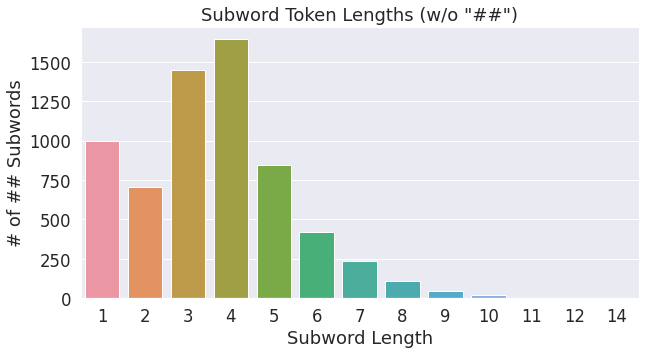

In [ ]:
sns.countplot(subword_lengths)
plt.title('Subword Token Lengths (w/o "##")')
plt.xlabel('Subword Length')
plt.ylabel('# of ## Subwords')

### Misspellings

In [ ]:
'misspelled' in tokenizer.vocab # Right

False

In [ ]:
'mispelled' in tokenizer.vocab # Wrong

False

In [ ]:
'government' in tokenizer.vocab # Right

True

In [ ]:
'goverment' in tokenizer.vocab # Wrong

False

In [ ]:
'beginning' in tokenizer.vocab # Right

True

In [ ]:
'begining' in tokenizer.vocab # Wrong

False

In [ ]:
'separate' in tokenizer.vocab # Right

True

In [ ]:
'seperate' in tokenizer.vocab # Wrong

False

What about contractions?

In [ ]:
"can't" in tokenizer.vocab

False

In [ ]:
"cant" in tokenizer.vocab

True

### Start vs. Mid Subwords

For single characters, there are both the individual character and the '##' version for every character. Is the same true of subwords?

In [ ]:
# For each token in the vocabulary...
for token in tokenizer.vocab.keys():
    
    # If it's a subword...
    if len(token) >= 2 and token[0:2] == '##':
        if not token[2:] in tokenizer.vocab:
            print('Did not find a token for', token[2:])
            break

Did not find a token for ом


In [ ]:
'##ly' in tokenizer.vocab

True

In [ ]:
'ly' in tokenizer.vocab

True

### Names



In [ ]:
!pip install wget

  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9682 sha256=9deef903556a8516e6c9f1926cfc56f52c2c641ab70658adc741b6004f5dc262
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [ ]:
import wget
import random 

print('Beginning file download with wget module')

url = 'http://www.gutenberg.org/files/3201/files/NAMES.TXT'
wget.download(url, 'first-names.txt')

Beginning file download with wget module


'first-names.txt'

In [ ]:
# Read them in.
with open('first-names.txt', 'rb') as f:
    names_encoded = f.readlines()

names = []

# Decode the names, convert to lowercase, and strip newlines.
for name in names_encoded:
    try:
        names.append(name.rstrip().lower().decode('utf-8'))
    except:
        continue

print('Number of names: {:,}'.format(len(names)))
print('Example:', random.choice(names))


Number of names: 21,985
Example: hoffer


In [ ]:
num_names = 0

# For each name in our list...
for name in names:

    # If it's in the vocab...
    if name in tokenizer.vocab:
        # Tally it.
        num_names += 1

print('{:,} names in the vocabulary'.format(num_names))

754 names in the vocabulary


**Further Research [DONE]**
* Add more modern names
    * This repo / file contains some more modern names. The file download isn't working, though.
    * `https://raw.githubusercontent.com/arineng/arincli/master/lib/male-first-names.txt`
* Add common names from other languages.


In [ ]:
import base64
import requests

master = "https://raw.githubusercontent.com/arineng/arincli/master/lib/male-first-names.txt"
#master = "https://raw.githubusercontent.com/arineng/arincli/master/lib/female-first-names.txt"
req = requests.get(master)
req = req.text
name_list = req.split("\n")

num_names = 0
for name in name_list:
    if name.lower() in tokenizer.vocab:
        num_names+=1

num_names_intersect = 0
for name in name_list:
    if name.lower() in names:
        num_names_intersect+=1

print('{:,}/{:,} names in the vocabulary, {:,} intersecting with the gutenberg list'.format(num_names,len(name_list),num_names_intersect))

64/1,220 names in the vocabulary, 1,113 intersecting with the gutenberg list


### Numbers

In [ ]:
# Count how many numbers are in the vocabulary.
count = 0

# For each token in the vocabulary...
for token in tokenizer.vocab.keys():

    # Tally if it's a number.
    if token.isdigit():
        count += 1
        
        # Any numbers >= 10,000?
        if len(token) > 4:
            print(token)

print('Vocab includes {:,} numbers.'.format(count))

092917
511228
87237
0815752199
1403962588
1884964311
1579583377
0415285569
0821419161
0691008000
0136120512
0062700553
0195082095
0684805332
0691152071
0816071365
300000
933346
0521820486
1852337520
10000
६३८५९६
000291
१६८२६
84433
9780521872386
9789004244870
00238
89800
12148
99947
Vocab includes 2,278 numbers.


In [ ]:
# Count how many dates between 1600 and 2021 are included.
count = 0 
for i in range(1600, 2021):
    if str(i) in tokenizer.vocab:
        count += 1

print('Vocab includes {:,} of 421 dates from 1600 - 2021'.format(count))

Vocab includes 421 of 421 dates from 1600 - 2021


### Parts of Speech Tagging

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
from nltk.corpus import wordnet as wn
words = ['amazing', 'interesting', 'love', 'great', 'nice']
pos_all = dict()
for w in words:
    pos_l = set()
    for tmp in wn.synsets(w):
        if tmp.name().split('.')[0] == w:
            pos_l.add(tmp.pos())
    pos_all[w] = pos_l
print(pos_all)

{'amazing': {'s'}, 'interesting': {'a'}, 'love': {'n', 'v'}, 'great': {'n', 's'}, 'nice': {'n', 's', 'a'}}


In [ ]:
from nltk.corpus import wordnet as wn

pos_all = dict()
for w in tokenizer.vocab:
    pos_l = set()
    for tmp in wn.synsets(w):
        if tmp.name().split('.')[0] == w:
            pos_l.add(tmp.pos())
    pos_all[w] = pos_l
print(pos_all)

{'[PAD]': set(), '[unused1]': set(), '[unused2]': set(), '[unused3]': set(), '[unused4]': set(), '[unused5]': set(), '[unused6]': set(), '[unused7]': set(), '[unused8]': set(), '[unused9]': set(), '[unused10]': set(), '[unused11]': set(), '[unused12]': set(), '[unused13]': set(), '[unused14]': set(), '[unused15]': set(), '[unused16]': set(), '[unused17]': set(), '[unused18]': set(), '[unused19]': set(), '[unused20]': set(), '[unused21]': set(), '[unused22]': set(), '[unused23]': set(), '[unused24]': set(), '[unused25]': set(), '[unused26]': set(), '[unused27]': set(), '[unused28]': set(), '[unused29]': set(), '[unused30]': set(), '[unused31]': set(), '[unused32]': set(), '[unused33]': set(), '[unused34]': set(), '[unused35]': set(), '[unused36]': set(), '[unused37]': set(), '[unused38]': set(), '[unused39]': set(), '[unused40]': set(), '[unused41]': set(), '[unused42]': set(), '[unused43]': set(), '[unused44]': set(), '[unused45]': set(), '[unused46]': set(), '[unused47]': set(), '[unu

In [ ]:
tag_frequency = {}
for pos in pos_all.values():
    for tag in pos:
        if tag in tag_frequency.keys():
            tag_frequency[tag] += 1
        else:
            tag_frequency[tag] = 1

In [ ]:
tag_frequency

{'a': 1103, 'n': 7154, 'r': 313, 's': 1195, 'v': 1732}

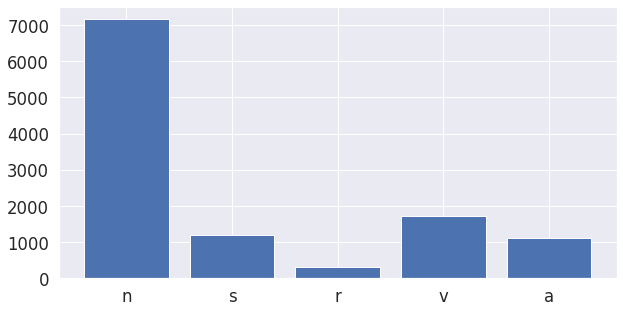

In [ ]:
import matplotlib.pyplot as plt

plt.bar(range(len(tag_frequency)), tag_frequency.values(), align='center')
plt.xticks(range(len(tag_frequency)), list(tag_frequency.keys()))

plt.show()